#### 【 이미지 픽셀 분포 분석 】

[1] 모듈 로딩 및 데이터 준비<hr>

In [7]:
## 모듈로딩
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [11]:
## 이미지 데이터 설정
IMG_FILE = '../Data/Image/mountain.jpg'


## 이미지 데이터 로딩
img_color = cv2.imread(IMG_FILE)
img_gray  = cv2.imread(IMG_FILE, cv2.IMREAD_GRAYSCALE)

print(img_gray.shape, img_gray.shape[0] * img_gray.shape[1])


(450, 600) 270000


[2] 이미지 픽셀 분포 분석 시각화<hr>

In [12]:
## 이미지 분포 계산
hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])


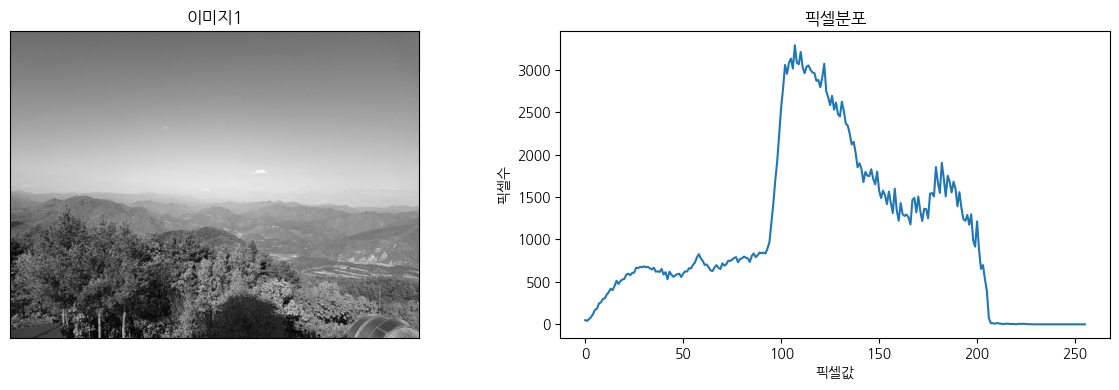

In [14]:
## ---------------------------------------------------
## 분포 시각화
## ---------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

titles = ['이미지1', '픽셀분포']
images = [img_gray, hist]

for ax, title, img_data in zip(axes, titles, images):
    ax.set_title(title)
    if title == '픽셀분포':
        ax.plot(img_data)
        ax.set_xlabel("픽셀값")
        ax.set_ylabel("픽셀수")
    else:
        ax.imshow(img_data, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()


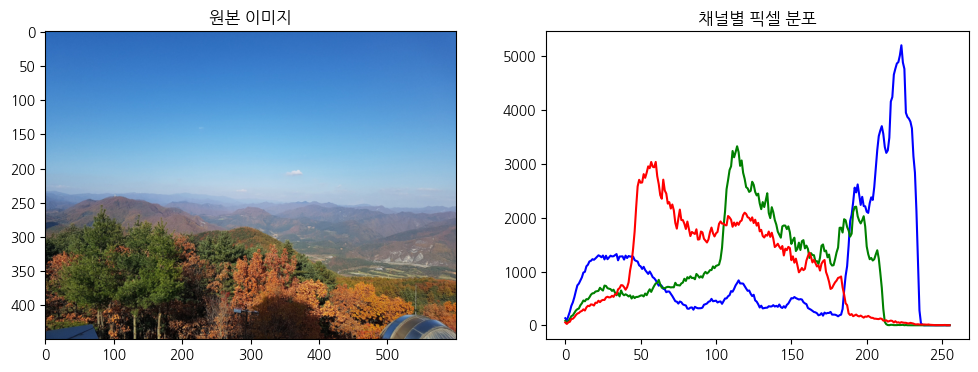

In [ ]:
## ---------------------------------------------------
## 채널별 분포 시각화
## ---------------------------------------------------
##- 채널 분리
channels = cv2.split(img_color)
colors   = ['b', 'g', 'r']

##- 원본 이미지와 채널별 픽셀 분포
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
ax1.set_title("원본 이미지")

for ch, color in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    ax2.plot(hist, color=color)
ax2.set_title("채널별 픽셀 분포")
plt.show()